<a href="https://colab.research.google.com/github/daalopezm/Sign-Lenguaje-DL/blob/main/SignAlphabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
#drive.mount('/content/gdrive/MyDrive/Portafolio/SignLenguaje/')
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


<h1>Cargando la base de datos</h1>
<p>Here we can upload the database that we load in a csv. Each row, is a pixel hence we must do a reshape.</p>

In [2]:
import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

WORK_DIRECTORY='/content/gdrive/MyDrive/Portafolio/SignLenguaje/'

file_train = os.path.join(WORK_DIRECTORY,'sign_mnist_train/sign_mnist_train.csv')
file_test = os.path.join(WORK_DIRECTORY,'sign_mnist_test/sign_mnist_test.csv')

data_set = {'TRAIN': pd.read_csv(file_train), 'TEST': pd.read_csv(file_test)}

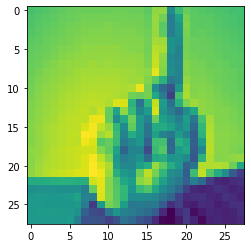

In [87]:
images_csv_train = [np.array(data_set['TRAIN'].iloc[i,1:785],dtype=np.uint8).reshape(28,28) 
          for i in range(data_set['TRAIN'].shape[0])] 
images_csv_test = [np.array(data_set['TEST'].iloc[i,1:785],dtype=np.uint8).reshape(28,28) 
          for i in range(data_set['TEST'].shape[0])] 
plt.imshow(images_csv_test[8])

<h1>Dataset Generators</h1>
<p>Memory has a limit, hence it is better to use a python generator. To give a good use to such tool, we must separate the images by their category.</p>

In [16]:
# import os
# import shutil
# sourcepath='/content/gdrive/MyDrive/'
# sourcefiles = os.listdir(sourcepath)
# destinationpath = '/content/gdrive/MyDrive/Untitled'

# for file in sourcefiles:
#     if file.endswith('.jpg'):
#         shutil.move(os.path.join(sourcepath,file), os.path.join(destinationpath,file))

In [3]:
from PIL import Image
from uuid import uuid4
import string

In [17]:
paths = {
    'TRAIN_LOCATION_IMAGES': os.path.join('data_train'),
    'TEST_LOCATION_IMAGES': os.path.join('data_test')
}

# Creating test-train directories
for path in paths.values():
  if not os.path.exists(path):
    os.makedirs(path)

# Defining letters.
alphabetic_letters = np.array([char for char in string.ascii_lowercase if char != 'j' if char != 'z']
)
numeric_letters = np.unique(data_set['TRAIN']['label'])

In [26]:
len(alphabetic_letters)

24

In [18]:
# Allocating images by category
dataset_types = ['TRAIN', 'TEST']
for dataset_type in dataset_types:

  for letter in numeric_letters:

    letra = alphabetic_letters[numeric_letters==letter][0]
    
    if not os.path.exists(os.path.join(paths[f'{dataset_type}_LOCATION_IMAGES'],f'{letra}')):
      os.makedirs(os.path.join(paths[f'{dataset_type}_LOCATION_IMAGES'],f'{letra}'))

    df_letter = data_set[dataset_type][data_set[dataset_type]['label']==letter]
    for i in range(df_letter['pixel1'].size):
      image = np.array(df_letter.iloc[i,1:785], dtype=np.uint8).reshape(28,28)
      img = Image.fromarray(image)
      img.save(os.path.join(paths[f'{dataset_type}_LOCATION_IMAGES'],f'{letra}',f'{uuid4()}_{letra}.jpg'))
  # df_letter.to_csv(os.path.join(paths['TRAIN_LOCATION'],f'{letter}',f'csv{letter}.csv'),index=False)

In [19]:
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_dir = paths['TRAIN_LOCATION_IMAGES']
test_dir = paths['TEST_LOCATION_IMAGES']

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split=0.2)


In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28,28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'training'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [22]:
from IPython.core.pylabtools import figsize
def plotImages(images_array):
  fig, axes = plt.subplots(nrows=1,ncols=7,figsize=(10,10))
  for img, ax in zip(images_array, axes):
    ax.imshow(img[:,:,0])
  plt.tight_layout()
  plt.show()


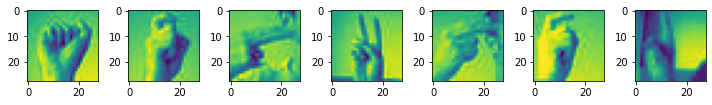

In [23]:
img,_= next(train_generator)
plotImages(img)

In [4]:
from PIL import Image
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


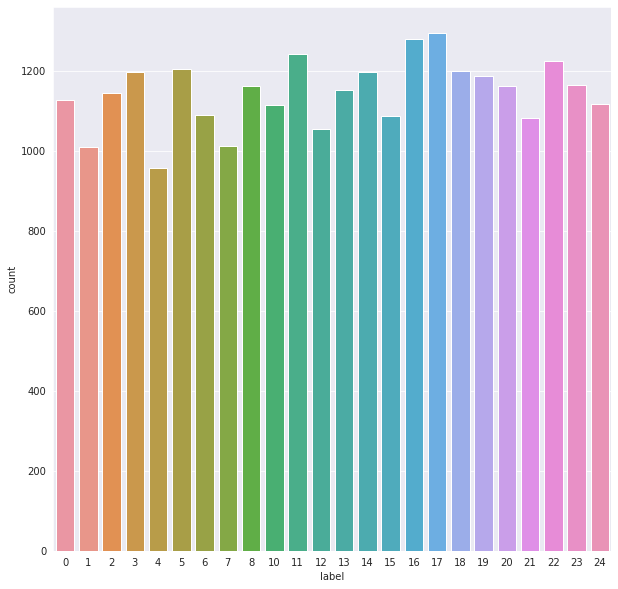

In [5]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(data_set_train['label'])


In [6]:
y_train = data_set_train['label'].values
y_test = data_set_test['label'].values

In [7]:
del data_set_train['label']
del data_set_test['label']

# Cleaning our database

In [8]:
data_set_train.isnull().values.any()

False

In [9]:
data_set_train[data_set_train.duplicated()]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


In [10]:
data_set_train.dtypes

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 784, dtype: object

In [34]:
data_set_train.select_dtypes(include=['int64'])

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


<h1>Neural Network Model</h1>
<p>Here we create our model. Because we will work with many models, lets call the first as <i>model_base</i>.

The layers should be stacked in a list. The first layer is the entry.

This entry is:
<i>tf.keras.layers.Flatten</i>
<b>Flatten</b> indicates that the images, which in this case are $28\times 28$, can be seen as a column vector.

The size of the output, should be of the number of classes, which in our case is:
*len(alphabetic_letters)*
</p>

In [28]:
model_base = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(len(alphabetic_letters))
    ])

In [31]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
_________________________________________________________________


<h3>Optimizer</h3>
<p>Here we choose the our optimizer, namely how, the gradient descent will be applied. Addam optimizer varies the learning rate, it is computationally demmand, but fastter in some cases. 
</p>

<h3>Loss function</h3>
<p>categorical_crossentropy is widely used to classify, hence, we select such loss function for our problem, due its own characteristics.</p>

In [32]:
model_base.compile(optimizer = 'adam', loss='categorical_crossentropy',
                   metrics = ['accuracy'])

trainner = model_base.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 13s 56ms/step - loss: 7.4100 - accuracy: 0.0543 - val_loss: 7.3521 - val_accuracy: 0.0393
Epoch 2/20
215/215 [==============================] - 8s 37ms/step - loss: 6.9016 - accuracy: 0.0553 - val_loss: 7.3521 - val_accuracy: 0.0393
Epoch 3/20
215/215 [==============================] - 8s 36ms/step - loss: 6.9016 - accuracy: 0.0553 - val_loss: 7.3521 - val_accuracy: 0.0393
Epoch 4/20
215/215 [==============================] - 8s 37ms/step - loss: 6.9016 - accuracy: 0.0553 - val_loss: 7.3521 - val_accuracy: 0.0393
Epoch 5/20
215/215 [==============================] - 8s 37ms/step - loss: 6.9016 - accuracy: 0.0553 - val_loss: 7.3521 - val_accuracy: 0.0393
Epoch 6/20
215/215 [==============================] - 8s 36ms/step - loss: 6.9016 - accuracy: 0.0553 - val_loss: 7.3521 - val_accuracy: 0.0393
Epoch 7/20
215/215 [==============================] - 8s 37ms/step - loss: 6.9016 - accuracy: 0.0553 - val_loss: 7.3521 - val_accuracy: 0.039